Monika Ucińska 234849

Patrycja Studzienna 234875

#Analysis of Anstructured Data - Assignment 3

In [60]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import re
import heapq
from textblob import TextBlob
import collections
from wordcloud import WordCloud , STOPWORDS
from textblob.sentiments import NaiveBayesAnalyzer

# SET 1.

In [2]:
twitter_consumer_key = "Y7JE6jFAgpVlVclFlHaQVjs4Q"
twitter_consumer_secret = "vEZogobL2OYdhgg8h2RfVV36ATt7oEWWZsXPpVaytFM9zV8iTy"
twitter_access_token = "1325143862021517313-ShD2bM8PcBh4tfMGGn8ANV4SMDsMWF"
twitter_access_secret = "9Z4NT4EhtjvQ0TyqfopSPo0MaCnIwJpjx7mSpbFUfC8dH"

In [3]:
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [32]:
ch = "41.5255,-87.3740,30km"  #Chicago 
search_words = "#Election2020 OR #GE2020 OR #GeneralElection OR #GeneralElection2020 OR #Election2020"
date_since = "2020-10-21"
date_until = "2020-11-08"

tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  since=date_since,
                  lang="en",
                  geocode=ch,
                  until = date_until,
                  tweet_mode='extended'
                      ).items(200)
t=[ti for ti in tweets]
print(len(t))
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.entities,
              tweet.full_text.encode("utf-8").decode("utf-8")] 
                for idx,tweet in enumerate(t)]

df1 =pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count","user", "entities", "text"])
df1['City'] = ["Chicago"]*len(t)

89


In [33]:
ch = "40.730610,-73.935242,30km"  #NY

tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  since=date_since,
                  lang="en",
                  geocode=ch,
                  until = date_until,
                  tweet_mode='extended'
                      ).items(200)
t=[ti for ti in tweets]
print(len(t))
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.entities,
              tweet.full_text.encode("utf-8").decode("utf-8")] 
                for idx,tweet in enumerate(t)]

df2 =pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count","user", "entities", "text"])
df2['City'] = ["NY"]*len(t)

200


In [34]:
ch = "34.052235,-118.24368,30km"  #LA

tweets = tweepy.Cursor(api.search,
                  q=search_words,
                  since=date_since,
                  lang="en",
                  geocode=ch,
                  until = date_until,
                  tweet_mode='extended'
                      ).items(200)
t=[ti for ti in tweets]
print(len(t))
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.entities,
              tweet.full_text.encode("utf-8").decode("utf-8")] 
                for idx,tweet in enumerate(t)]

df3 =pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count","user", "entities", "text"])
df3['City'] = ["LA"]*len(t)

200


In [35]:
df = pd.concat([df1, df2, df3],ignore_index=True)
df.tail(15)

,id,created_at,favorite_count,retweet_count,user,entities,text,City
474,1325223168823472129,2020-11-07 23:46:39,0,374,GrifterIX,"{'hashtags': [], 'symbols': [], 'user_mentions...",RT @cenkuygur: Trump is thinking of firing his...,LA
475,1325223147151319040,2020-11-07 23:46:34,0,340,Sydney G.,"{'hashtags': [{'text': 'cheers', 'indices': [7...",RT @iHasCupquake: It’s not even 10am but meanw...,LA
476,1325223144194453504,2020-11-07 23:46:33,0,1041,Arvid Nikolai Kildahl,"{'hashtags': [{'text': 'Election2020', 'indice...",RT @feministabulous: The man who mocked disabi...,LA
477,1325223122690330626,2020-11-07 23:46:28,0,339,occupycorruptDC,"{'hashtags': [{'text': 'Election2020', 'indice...","RT @ScriberrNews: ""closely examine their resul...",LA
478,1325223096333332481,2020-11-07 23:46:22,0,1321,Leesa Novotny,"{'hashtags': [{'text': 'MAGA', 'indices': [25,...",RT @cenkuygur: For every #MAGA clown who said ...,LA
479,1325223041492635648,2020-11-07 23:46:09,0,1321,Gaiß A.,"{'hashtags': [{'text': 'MAGA', 'indices': [25,...",RT @cenkuygur: For every #MAGA clown who said ...,LA
480,1325223036186816512,2020-11-07 23:46:07,0,1,Saundra Bales🌊🗽🇺🇸,"{'hashtags': [{'text': 'MAGA', 'indices': [54,...","RT @tazinib1: So, who’s the snowflake again???...",LA
481,1325222974979403776,2020-11-07 23:45:53,0,1321,Eve Thorne,"{'hashtags': [{'text': 'MAGA', 'indices': [25,...",RT @cenkuygur: For every #MAGA clown who said ...,LA
482,1325222969656791040,2020-11-07 23:45:52,0,311,KMFDT,"{'hashtags': [], 'symbols': [], 'user_mentions...","RT @Zadi: Ok, just learned that one of @JoeBid...",LA
483,1325222911960084482,2020-11-07 23:45:38,0,1321,susan b,"{'hashtags': [{'text': 'MAGA', 'indices': [25,...",RT @cenkuygur: For every #MAGA clown who said ...,LA


In [37]:
df.to_json('SET1')
df = pd.read_json('SET1')

Data frame has 489 raws. We extract data for every city independly to have more than just 200 raws. In New York and Los Angeles there are much more tweets conected with election so 200 tweets are only from 1-2 days. For Chcago there are less tweets but they are from longer time range.

In [13]:
df1 = df[df.City != 'Chicago']
df2 = df[df.City != 'NY']
df3 = df[df.City != 'LA']

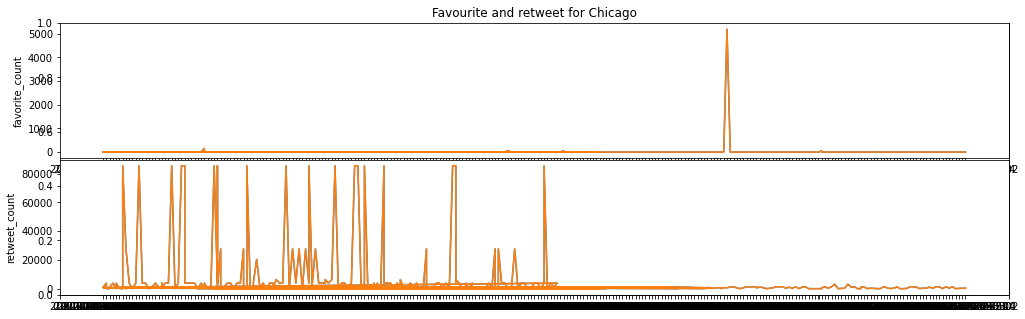

In [14]:
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(17,5))
fig.subplots_adjust(hspace=0.01,wspace=0.01)
plt.title('Favourite and retweet for Chicago')
n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df1["created_at"],df1[ylabel])
    ax.plot(df1["created_at"],df1[ylabel])
    ax.set_ylabel(ylabel)

plt.show()

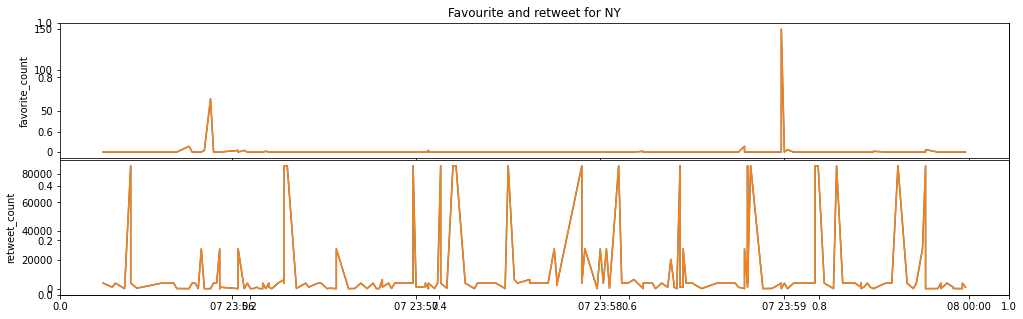

In [11]:
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(17,5))
fig.subplots_adjust(hspace=0.01,wspace=0.01)
plt.title('Favourite and retweet for NY')
n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df2["created_at"],df2[ylabel])
    ax.plot(df2["created_at"],df2[ylabel])
    ax.set_ylabel(ylabel)

plt.show()

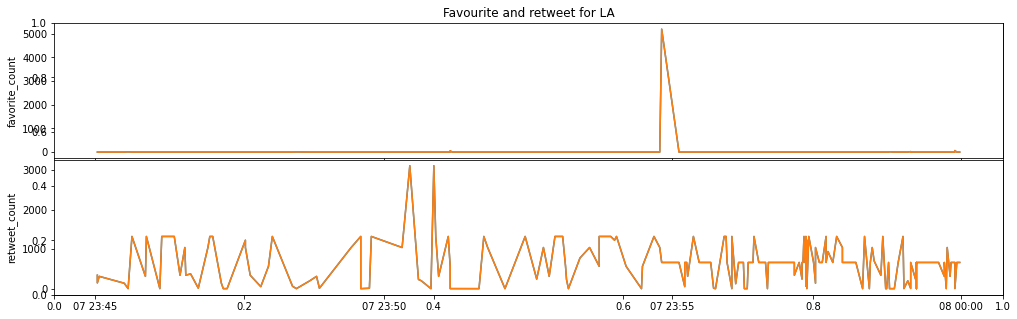

In [12]:
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(17,5))
fig.subplots_adjust(hspace=0.01,wspace=0.01)
plt.title('Favourite and retweet for LA')
n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df3["created_at"],df3[ylabel])
    ax.plot(df3["created_at"],df3[ylabel])
    ax.set_ylabel(ylabel)

plt.show()

There are three figures each for every city because of different time range for every city. There are much more tweets for date 07-08.11.2020.

We can see that tweets are more often retweet than add to favourite.

In [16]:
x = pd.DataFrame([["Chicago", sum(df1["favorite_count"])],
                   ["NY",sum(df2["favorite_count"])],
                   ["LA",sum(df3["favorite_count"])]], 
                 columns=["city", "favorite_count"])
x

,city,favorite_count
0,Chicago,5630
1,NY,5549
2,LA,413


Text(0.5, 1.0, 'Favorite_count for cities')

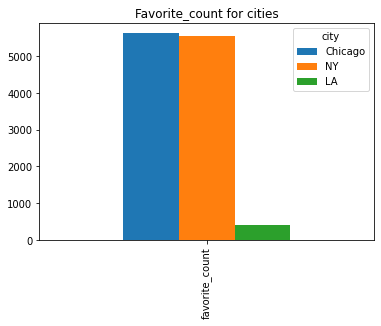

In [18]:
x.set_index('city').T.plot(kind='bar')
plt.title('Favorite_count for cities')

There is less tweets from Chicago but they are more often added to favourite. For LA even for big number of tweets we have smaller favourite_count value.

In [20]:
x["retweet_count"] = [sum(df1["retweet_count"]),
                   sum(df2["retweet_count"]),
                   sum(df3["retweet_count"])]

x

,city,favorite_count,retweet_count
0,Chicago,5630,2532106
1,NY,5549,128602
2,LA,413,2403668


Text(0.5, 1.0, 'Retweet_count for cities')

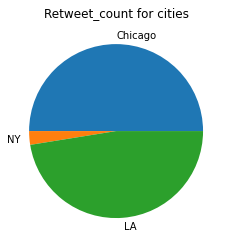

In [22]:
plt.pie(x["retweet_count"],labels=x["city"])
plt.title('Retweet_count for cities')

There is similar situation for Chicago in case of retweets. Tweets from NY aren't retweeted many times.


## Hashtags

In [41]:
hashtags = []
for i in range(len(df["entities"])):
  for z in range(len(df["entities"][i]['hashtags'])):
    hashtags.append(df["entities"][i]['hashtags'][z]['text'])

len(hashtags)

820

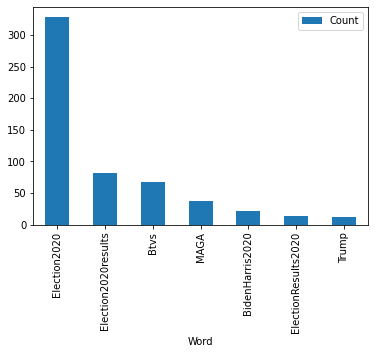

In [44]:
wordcount = {}
for word in hashtags:
    if word not in wordcount:
      wordcount[word] = 1
    else:
      wordcount[word] += 1

word_counter = collections.Counter(wordcount)

lst = word_counter.most_common(7)
dff = pd.DataFrame(lst, columns = ['Word', 'Count'])
dff.plot.bar(x='Word',y='Count')

We can see that hashtags with Biden name is more polpular than #Trump.

In [45]:
Trump = 0
Biden = 0

for i in hashtags:
  if "Trump" in i or "trump" in i:
    Trump += 1
  elif "Biden" in i or "biden" in i:
    Biden += 1

dff = pd.DataFrame([['Trump', Trump],["Biden", Biden]], columns=['name', 'value'])

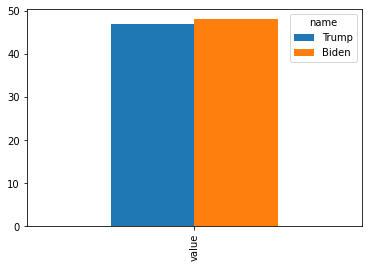

In [46]:
dff.set_index('name').T.plot(kind='bar')

It is also true when we sum up all hashtags with theirs names.

In [48]:
trump_ch = 0
biden_ch = 0
trump_ny = 0
biden_ny = 0
trump_la = 0
biden_la = 0

for i in range(len(df["entities"])):
  if df["City"][i]=="Chicago":
    for j in range(len(df["entities"][i]['hashtags'])):
      k =df["entities"][i]['hashtags'][j]['text']
      if "Trump" in k or "trump" in k:
        trump_ch += 1
      elif "Biden" in k or "biden" in k:
        biden_ch += 1
  elif df["City"][i]=="NY":
    for j in range(len(df["entities"][i]['hashtags'])):
      k = df["entities"][i]['hashtags'][j]['text']
      if "Trump" in k or "trump" in k:
        trump_ny += 1
      elif "Biden" in k or "biden" in k:
        biden_ny += 1
  elif df["City"][i]=="LA":
    for j in range(len(df["entities"][i]['hashtags'])):
      k = df["entities"][i]['hashtags'][j]['text']
      if "Trump" in k or "trump" in k:
        trump_la += 1
      elif "Biden" in k or "biden" in k:
        biden_la += 1

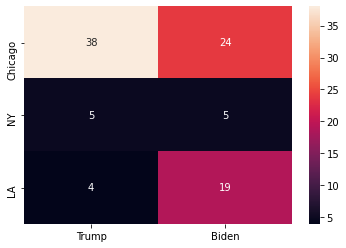

In [49]:
ax = sns.heatmap(pd.DataFrame([[trump_ch, biden_ch],[trump_ny,biden_ny],[trump_la,biden_la]], columns=["Trump",'Biden'], index=["Chicago", "NY", "LA"]), annot=True)

But on the heatmap we see that in Chicago Trump was in more hastags than Biden.

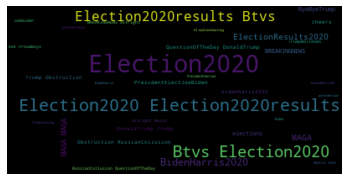

In [52]:
hashtag = ''

for i in range(len(hashtags)): 
    j = hashtags[i]
      
    hashtag += " "+j+" "

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate(hashtag)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Posts

In [58]:
text =[]
for i in range(len(df["text"])):
  text.append(df["text"][i])

In [54]:
import nltk
nltk.download('popular')
from nltk.tokenize import RegexpTokenizer,word_tokenize,sent_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [55]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

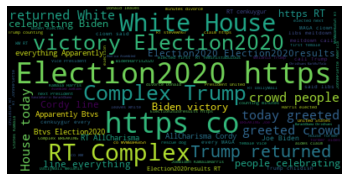

In [56]:
Text = ''
Tokenizer = RegexpTokenizer(r"[A-Za-z0-9-]+")
for i in range(len(text)): 
  
  separated_text = Tokenizer.tokenize(text[i])
  separated_text_cleaned = [word for word in separated_text if word.lower() not in eng_stopwords]
  sentence = ''
  for j in separated_text_cleaned:
    sentence += " "+j+" "
  Text += " "+sentence+" "

wordcloud = WordCloud(stopwords=eng_stopwords).generate(Text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

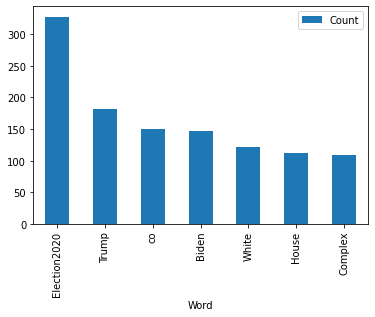

In [59]:
text2 = []

for tweet in text:
  separated_text = Tokenizer.tokenize(tweet)
  separated_text_cleaned = [word for word in separated_text if word.lower() not in eng_stopwords]
  for word in separated_text_cleaned:
    if word!='https' and word!="RT":
      text2.append(word)

wordcount = {}
for word in text2:
    if word not in wordcount:
      wordcount[word] = 1
    else:
      wordcount[word] += 1

word_counter = collections.Counter(wordcount)

lst = word_counter.most_common(7)
dff = pd.DataFrame(lst, columns = ['Word', 'Count'])
dff.plot.bar(x='Word',y='Count')

In posts we have different situation. Tram is more popular than Biden.

##Sentiment

In [64]:
df['Sentiment']=np.zeros((len(df['id']),1))
df['Sentiment_value']=np.zeros(((len(df['id']),1)))

for i in range(len(df["text"])):
  blob_object = TextBlob(df["text"][i], analyzer=NaiveBayesAnalyzer())
  df['Sentiment'][i] = blob_object.sentiment[0]
  df['Sentiment_value'][i] = blob_object.sentiment[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


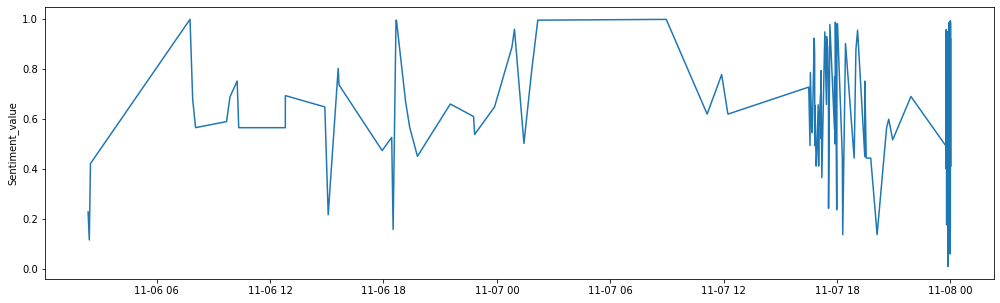

In [65]:
df = df.sort_values(by=['created_at'])
ylabels = ["Sentiment_value"]

fig = plt.figure(figsize=(17,5))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

There is no visible trend in data. We just observe that we have more data for the last days of our time period.

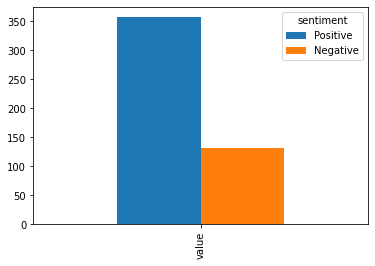

In [66]:
pos = 0
neg = 0

for i in range(len(df["Sentiment"])):
  if df["Sentiment"][i] == 'pos':
    pos += 1
  else:
    neg += 1

dff = pd.DataFrame([['Positive', pos],["Negative", neg]], columns=['sentiment', 'value'])
dff.set_index('sentiment').T.plot(kind='bar')

In general posts are positive.

In [67]:
pos_ch = 0
neg_ch = 0
pos_ny = 0
neg_ny = 0
pos_la = 0
neg_la = 0

for i in range(len(df["Sentiment"])):
  if df["City"][i] == "Chicago":
    if df["Sentiment"][i] == 'pos':
      pos_ch += 1
    else:
      neg_ch += 1
  elif df["City"][i] == "NY":
    if df["Sentiment"][i] == 'pos':
      pos_ny += 1
    else:
      neg_ny += 1
  else:
    if df["Sentiment"][i] == 'pos':
      pos_la += 1
    else:
      neg_la += 1

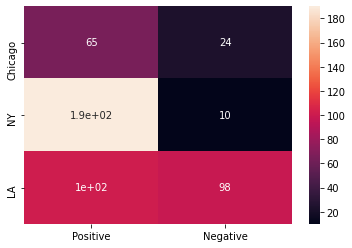

In [68]:
ax = sns.heatmap(pd.DataFrame([[pos_ch, neg_ch],[pos_ny,neg_ny],[pos_la,neg_la]], columns=["Positive",'Negative'], index=["Chicago", "NY", "LA"]), annot=True)

The biggest difference between positiv and negative posts is for NY. In LA the numbers are almost equal.

Because of different number of posts for each city it is better to compare the mean of sentiment value.

In [69]:
sen_ch = []
sen_ny = []
sen_la = []

for i in range(len(df["Sentiment_value"])):
  if df["City"][i] == "Chicago":
    sen_ch.append(df["Sentiment_value"][i])
  elif df["City"][i] == "NY":
    sen_ny.append(df["Sentiment_value"][i])
  else:
    sen_la.append(df["Sentiment_value"][i])

sen_ch = np.mean(sen_ch)
sen_ny = np.mean(sen_ny)
sen_la = np.mean(sen_la)

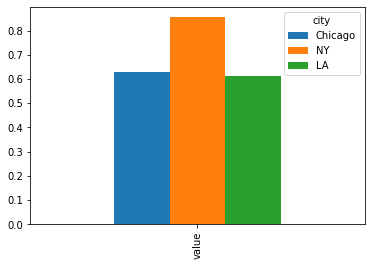

In [70]:
dff = pd.DataFrame([['Chicago', sen_ch],["NY", sen_ny],["LA", sen_la]], columns=['city', 'value'])
dff.set_index('city').T.plot(kind='bar')

If we compare the mean of this sentiment value NY has still the most positive posts.

# SET 2.

In [ ]:
userID1 = 'JoeBiden'
userID2 = 'realDonaldTrump'

In [ ]:
tweets1 = api.user_timeline(screen_name=userID1,
                           count=1200,
                           include_rts = False,
                           tweet_mode = 'extended'
                           )
tweets2 = api.user_timeline(screen_name=userID2,
                           count=1200,
                           include_rts = False,
                           tweet_mode = 'extended'
                           )

In [ ]:
outtweets1 = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.full_text.encode("utf-8").decode("utf-8")] 
                for idx,tweet in enumerate(tweets1)]

outtweets2 = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.user.name,
              tweet.full_text.encode("utf-8").decode("utf-8")] 
                for idx,tweet in enumerate(tweets2)]

df1 = pd.DataFrame(outtweets1,columns=["id","created_at","favorite_count","retweet_count","user", "text"])
df2 = pd.DataFrame(outtweets2,columns=["id","created_at","favorite_count","retweet_count","user", "text"])

In [ ]:
def data_from_time(df):
  end_date = datetime.datetime(2020, 11, 9)
  start_date = datetime.datetime(2020, 9, 2)

  for i, row in df.iterrows():
      if row['created_at']<start_date or row['created_at']>end_date:
        df = df.drop(i)
  return df

In [ ]:
df1 = data_from_time(df1)
df2 = data_from_time(df2)

In [ ]:
df = pd.concat([df1, df2],ignore_index=True)
df

,id,created_at,favorite_count,retweet_count,user,text
0,1325261759456874499,2020-11-08 02:20:00,722329,74976,Joe Biden,From the bottom of my heart: thank you. https:...
1,1325259242631274496,2020-11-08 02:10:00,915707,69020,Joe Biden,A nation united.\n\nA nation strengthened.\n\n...
2,1325258739318927361,2020-11-08 02:08:00,623390,41334,Joe Biden,"With full hearts and steady hands, with faith ..."
3,1325257984562192385,2020-11-08 02:05:00,340617,23350,Joe Biden,"Tonight, the whole world is watching America. ..."
4,1325257229625421825,2020-11-08 02:02:00,478019,36019,Joe Biden,Especially for those moments when this campaig...
...,...,...,...,...,...,...
170,1322922596195684353,2020-11-01 15:25:00,71896,8325,Joe Biden,If you’re sick or struggling or worried about ...
171,1322918821242556425,2020-11-01 15:10:00,48625,7220,Joe Biden,From his heinous acts of separating families a...
172,1322914542892929024,2020-11-01 14:53:00,269123,22999,Joe Biden,2 days. Finish strong.
173,1322907244871102464,2020-11-01 14:24:00,288954,28343,Joe Biden,I promise you this: I’ll end Donald Trump’s ch...


In [ ]:
df.to_csv('SET2')

Now we are going to work on saved dataframe. 

In [ ]:
df = pd.read_csv('SET2', index_col='Unnamed: 0')

Firstly, we want to clean it a little bit. We will substract all URL's, and change *created_at* column to datatime object. The we are going to sort data over time and reset index.



In [ ]:
def clean_tweet(tweet): 
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [ ]:
def cleaning(df):
  for i in range(df.index[0], df.index[0]+len(df)):
    #clean
    tweet = df["text"][i]
    df["text"][i] = clean_tweet(tweet)

    #datetime
    date_time_str = df["created_at"][i]
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    df["created_at"][i] = date_time_obj
  return df

In [ ]:
def change_index(df):
  df = df.reset_index(drop = True)
  return df

In [ ]:
df = cleaning(df)
df = df.sort_values("created_at") # sort it by time
df = change_index(df)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,created_at,favorite_count,retweet_count,user,text
0,1323052200814366720,2020-11-02 00:00:00,16860,3840,Joe Biden,Donald Trump is trying to eliminate the entire...
1,1323057366510817284,2020-11-02 00:20:32,101454,10132,Joe Biden,Together we can make Donald Trump a one term p...
2,1323062266200264705,2020-11-02 00:40:00,17190,2577,Joe Biden,I want to help restore hope in this country an...
3,1323069815880327173,2020-11-02 01:10:00,139163,18522,Joe Biden,Under my tax plan no one making under 400 000 ...
4,1323073590749614080,2020-11-02 01:25:00,39326,3809,Joe Biden,From Arizona to Georgia to Wisconsin and beyon...
...,...,...,...,...,...,...
296,1325442345396039680,2020-11-08 14:17:35,291165,46675,Donald J. Trump,Where it mattered they stole what they had to ...
297,1325511603157159942,2020-11-08 18:52:47,613379,112135,Donald J. Trump,Since when does the Lamestream Media call who ...
298,1325527391993786374,2020-11-08 19:55:32,242566,61833,Donald J. Trump,Investigators Dispatched After Fulton County D...
299,1325563462433509376,2020-11-08 22:18:51,344071,64419,Donald J. Trump,Watch at 8 00 P M Will discuss the Mail In Bal...


Now we are going to make dataframes only for Biden and Trump.

In [ ]:
df1 = change_index(df[df["user"]=="Joe Biden"])
df2 = change_index(df[df["user"]=="Donald J. Trump"])

In [ ]:
print('Number of Bidens tweets from week: '+str(len(df1))+'.')
print('Number of Trumps tweets from week: '+str(len(df2))+'.') # Number is very similar!

Number of Bidens tweets from week: 150.
Number of Trumps tweets from week: 151.


Number of both candidates tweets over one week is very similar. Also, posting 150 post per week, means more than 21 per day! 

### Number of tweets, retweets, likes over time

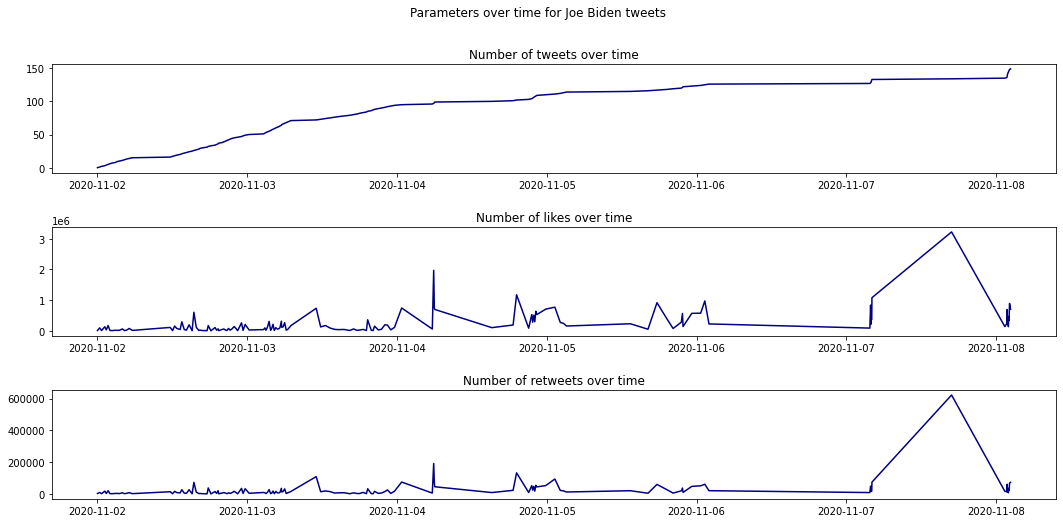

In [ ]:
f, ax = plt.subplots(3,1,figsize=(18,8))
f.subplots_adjust(hspace=0.5)

ax[0].plot(df1["created_at"], df1.index, color = 'navy') 
ax[0].set_title('Number of tweets over time')

ax[1].plot(df1["created_at"],df1["favorite_count"], color = 'navy')
ax[1].set_title('Number of likes over time')

ax[2].plot(df1["created_at"],df1["retweet_count"], color = 'navy')
ax[2].set_title('Number of retweets over time')

f.suptitle('Parameters over time for Joe Biden tweets')
plt.show()

The first thing that comes to mind with looking at *Number of tweets* plot is that in the first days he did actualy post more often than in the last days. We will check it more clearly using countplot later.

With *Number of likes over time* we shold see that number of likes varies between 0 and 3000000. Surely, the maximum of likes wasn't achived often, but still this number is marvelous. 

In [ ]:
print('Highest number of likes on Biden post was: ', max(df["favorite_count"]), '.')

Highest number of likes on Biden post was:  3220198 .


What is also interesting, there was also one post which got highest number of retweets. Until 7.11.2020 his post retweets oscilated between 0 and 200000, when after this date it goes to 600000! Let's find text of this post!

In [ ]:
max_value = max(df["favorite_count"])
lista = list(df["favorite_count"])
ind = lista.index(max_value)
print(df["text"][ind])

America I m honored that you have chosen me to lead our great country The work ahead of us will be hard but I promise you this I will be a President for all Americans whether you voted for me or not I will keep the faith that you have placed in me


We see really similar situation about retweets. Is it true that it the same post who got so popular in both likes and retweets? 

In [ ]:
max_value2 = max(df["retweet_count"])
lista2 = list(df["retweet_count"])
ind2 = lista2.index(max_value2)

ind == ind2

True

So it was a post about him winning the election.

Now let's take a look at Trumps data.

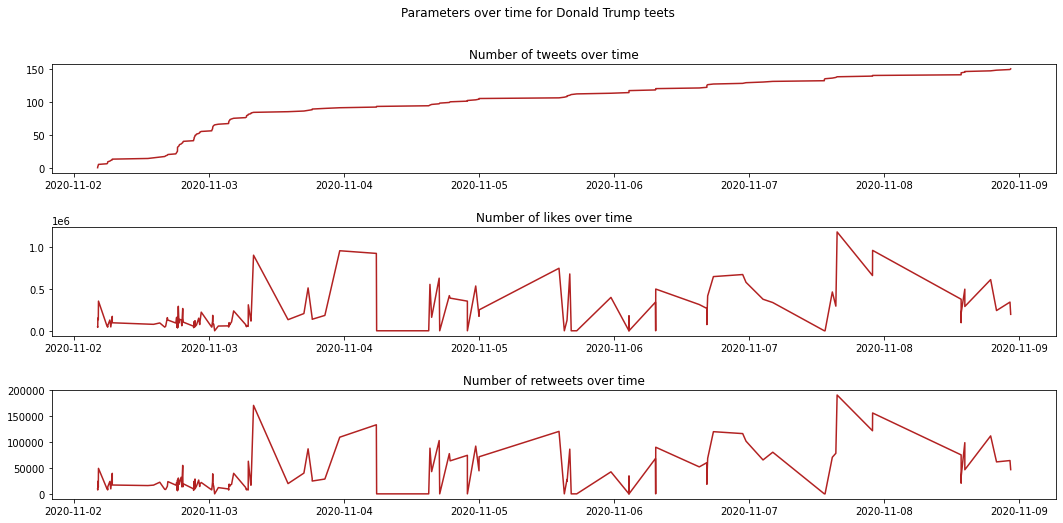

In [ ]:
f, ax = plt.subplots(3,1, figsize = (18,8))
f.subplots_adjust(hspace = 0.5)

ax[0].plot(df2["created_at"], df2.index, color = 'firebrick')
ax[0].set_title('Number of tweets over time')

ax[1].plot(df2["created_at"], df2["favorite_count"], color = 'firebrick')
ax[1].set_title('Number of likes over time')

ax[2].plot(df2["created_at"], df2["retweet_count"], color = 'firebrick')
ax[2].set_title('Number of retweets over time')

f.suptitle('Parameters over time for Donald Trump teets')
plt.show()

In *Number of tweets* chart we schould see that he posted much more at the first two days than in rest summing up. Then number of new post was rather constant. We will also see it later on counterplot.

Looking at *Number of likes over time plot* we seethat it does look diffrent from Bidens. Firstly, he doesn't habe constant number, one post can have almost 0 likes, and the next can have 1000000. It is really unconstant plot, but what is worth mentioning, Biden's maximum was about 3 times Trump's. 

*Number of retweets* plot looks really similar to *Number of likes plot. We can see similar shape, similar places where it does have picks, only number of retweets is 5 times smaller than for likes. So we can say that if someone likes his tweet, there is around 20% chance that he will also retweet it. 

##### Likes and retweets

Seing how similar those two plots for Trump's likes and retweets looks like we wanted to also put them in one plot, to see clearly dependence.

Text(0.5, 1.0, 'Retweets')

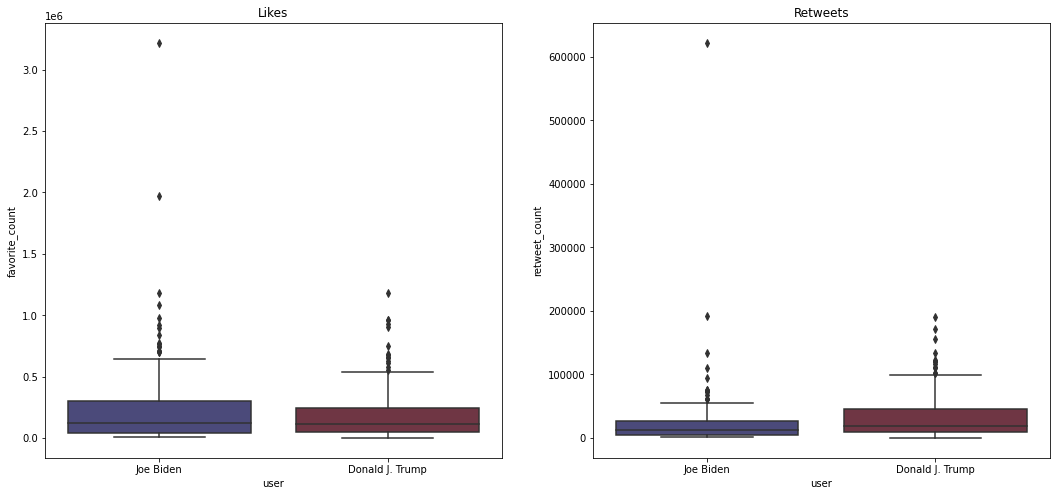

In [ ]:
f,ax=plt.subplots(1,2, figsize=(18,8))

sns.boxplot(x="user", y="favorite_count", data=df, ax=ax[0], palette="icefire").set_title("Likes")
sns.boxplot(x="user", y="retweet_count", data=df, ax=ax[1], palette = "icefire").set_title("Retweets")

So here we can clearle see that Biden has larger number in outliers than Trump in both boxplots. 

For *Likes* chart we can see that median for both men is really similar. Minimum of both plots is around zero, $Q_{0.25}$ for Biden is slightly smaller than for Trump, but $Q_{0.75}$ is bigger, what makes whole box for Biden wider (bigger $IQR$). This means that responses to his tweets tends to have more varied values. Both of plots have vider upper moustache, just like the outliers tend to be only unupper side of plot. The maximum value is also bigger for Biden, he also does have outliers very far avay from box. 

Talking about *retweets* plot we have slightly diffrent situation. This time much higher values on almost everything have Trump. His bohplot is much wider, all his quantiles are bigger, also maximum value. It says that he is more likely to get much more retweets than Biden.


### Tweets by time

Now we are going to check in which time of the day our candidates are posting. We were also curious about more precise information about number of post during each day. Both information will be counted in function *day_and_hour*.

Parts of day:

* Morning - This is the time from 6:00 to 12:00.

* Afternoon - From 12:00 to approximately 18:00 hours.

* Evening - From approximately 18:00 hours to 00:00 hours.

* Night - From 00:00 to 06:00. 

Time in America is 6 hours before time in Poland, so witch saying in which part of day candidates posted, we will subtract this 6 hours.

In [ ]:
def day_and_hour(df):
  days = []
  parts = []
  for i in range(df.index[0],df.index[0]+len(df)):
    do = df["created_at"][i] # time
    days.append(do.date()) # we want here only date
    hour1 = do.hour-6 # subtracing 6 hours

    if hour1<0:
      hour1 = 24 + hour1

    if hour1<6:
      parts.append("Night")
    elif hour1<12:
      parts.append("Morning")
    elif hour1<18:
      parts.append("Afternoon")
    else:
      parts.append("Evening")
  df["date"] = days
  df["time"]= parts
  return df

In [ ]:
df1 = day_and_hour(df1)
df2 = day_and_hour(df2)

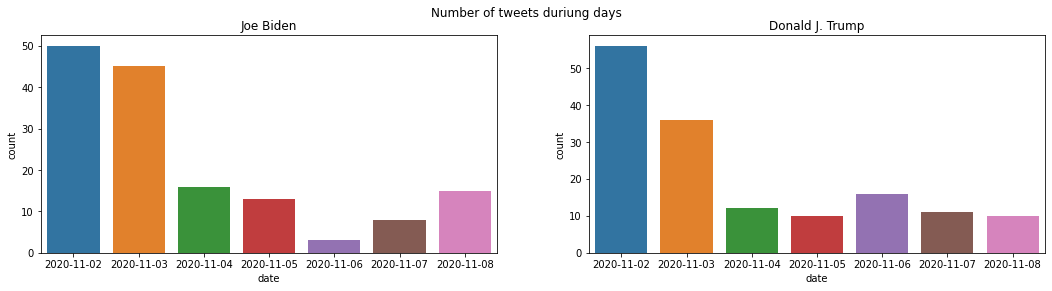

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,4))

sns.countplot(x="date", data=df1, ax=ax[0])
ax[0].set_title('Joe Biden')

sns.countplot(x="date", data=df2, ax=ax[1])
ax[1].set_title('Donald J. Trump')

f.suptitle('Number of tweets duriung days')
plt.show()

Firstly - let's look at days of posting. 

For Biden we see that first two days of this analysis he was very active on tweeter, posting around 45-50 tweets per day. After that, like we have seen in *Number of thweets over time* plot, he wasn't as active, posting only 5-20 tweets per day. 

For Trump saituation is kind of similar, the first days were also more acitive, but clearly 2.11.2020 much more than next. Where on that day he did post around 55 post, in the next it was around 30% less. The rest of week, similar to Biden, he was much less active.

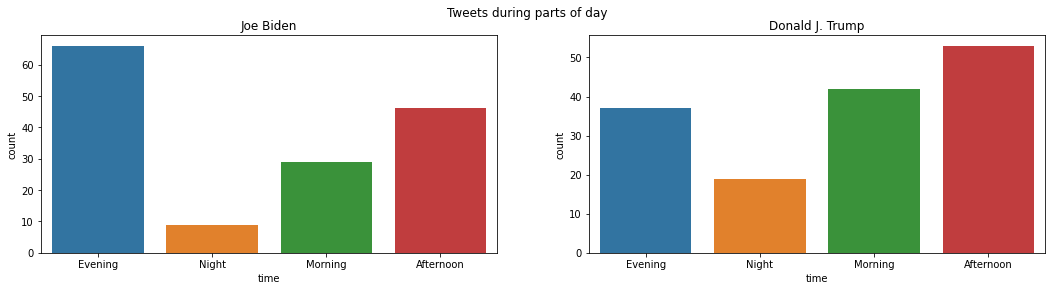

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,4))

sns.countplot(x="time", data = df1, ax = ax[0])
ax[0].set_title('Joe Biden')

sns.countplot(x="time", data = df2, ax = ax[1])
ax[1].set_title('Donald J. Trump')

f.suptitle('Tweets during parts of day')
plt.show()

Looking at parts of day, we doesn't see much of a dependence in both of candidates. Surely, they both prefer to tweet during thay than night, but where Biden barery tried to do it at night, Trump was twise more active there. He also posted more than Biden in mornings and Afternoons, but when he was less online on the evenings, most Biden's post were from that part of day.

### Hashtags

With function *cleaning* we deleted specific characgetrs like hashtags from text. Thats why now we are going to get our data from csv again.

In [ ]:
df_dirty = pd.read_csv("SET2", index_col='Unnamed: 0')
df1_dirty = df_dirty[df_dirty["user"]=="Joe Biden"]
df2_dirty = df_dirty[df_dirty["user"]=="Donald J. Trump"]

Now we are going to create function *get_splitted* which will split our data 

In [ ]:
def get_splitted(df, symbol):
  splitted = []
  for i in range(df.index[0], df.index[0]+len(df)):
    string = df["text"][i]
    sep1 = symbol
    sep2 = ' '
    number_of_hash = string.count(sep1) # check how many hashtags are there 
    for j in range(0, number_of_hash):
      string = string.split(sep1, 1)[1] # separate name using -
      if sep2 in string:
        string1 = string.split(sep2, 1)[0]
        string = string.split(sep2, 1)[1]
      string1 = re.sub('[!?.,:-]', '', string1)
      splitted.append(string1)
  return splitted

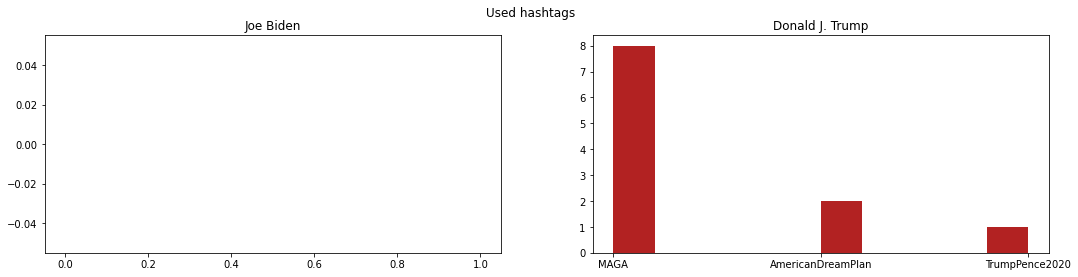

In [ ]:
hashtags_biden = get_splitted(df1_dirty, '#') # check hashtags for Joe Biden and Donald Trump
hashtags_trump = get_splitted(df2_dirty, '#')

f, ax = plt.subplots(1,2,figsize=(18,4))

ax[0].hist(hashtags_biden, color = 'navy')
ax[0].set_title('Joe Biden')

ax[1].hist(hashtags_trump, color = 'firebrick')
ax[1].set_title('Donald J. Trump')

f.suptitle('Used hashtags')
plt.show()

First thing that comes when we see this plots is definitely the fact that Biden's is empty. This is not a mistake, he actually didn't post anything with "#" in this time. When we look at the second plot, two most used hashtags is "MAGA", which is Trump's election slogan, so it is not suprising that he used it (summing up) 8 times in just a week. He didn't use many other hashtags, only three times (summing up) and every of them was about election in United States.

Now we were also interested in what people were tagged in their tweets. To see it we can use function from above, just with character '@'.

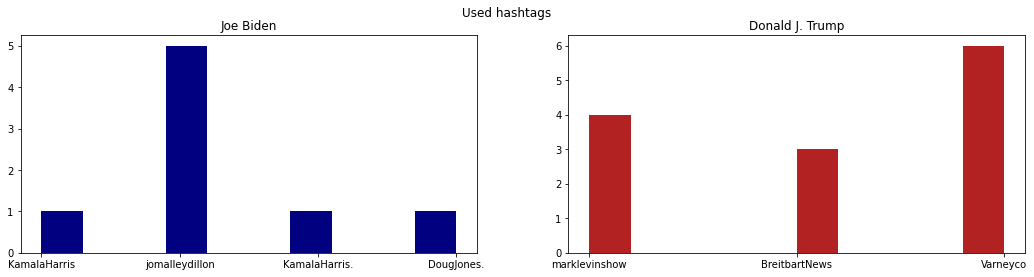

In [ ]:
 tags_biden = get_splitted(df1_dirty, '@')
tags_trump = get_splitted(df2_dirty, '@')

f, ax = plt.subplots(1,2,figsize=(18,4))

ax[0].hist(tags_biden, color = 'navy')
ax[0].set_title('Joe Biden')

ax[1].hist(tags_trump, color = 'firebrick')
ax[1].set_title('Donald J. Trump')

f.suptitle('Used hashtags')
plt.show()

For Biden's tag we see that he mostly added Joe O'malley Dilon, who is a politic, political strategist and the campaign manager for the 2020 presidential campaign of Joe Biden. The second used tag is Kamala Harris, The first Black and Indian American woman to represent California in the United States Senate and now is supposed to be Bidens vice president. 

For Trump's tags we can see that there are no people, but News and Shows. Mostly tagged is Varney & Co., which is an American cable television news and talk show on the Fox Business Network. Then we have The Mark Levin Show - conservative talk radio show hosted by Mark Levin. And lastly, tagged three times - Breitbart Newa - Syndicated news and opinion website providing continuously updated headlines to top news and analysis sources.

### Did they mention eachother in their posts?

We know that they didn't tag one another. But did they post about it?

In [ ]:
def search(df, word):
  count = 0
  text = []
  for i in range(0, len(df)):
    if word in df["text"][i]:
      count+=1
      text.append(df["text"][i])
  if not text:
    print(str(word)+' wasnt mentioned')
  else:
    print(str(word)+' was mentioned '+str(count)+' times in texts: '+str(text))

In [ ]:
search(df1, 'Trump')

Trump was mentioned 26 times in texts: ['Donald Trump is trying to eliminate the entire Affordable Care Act in the middle of a pandemic If he gets his way more than 100 million Americans with pre existing conditions could see their costs skyrocket or be denied coverage altogether We can t let him win', 'Together we can make Donald Trump a one term president', 'Donald Trump s COVID 19 response has been the greatest failure of presidential leadership in our nation s history', 'When Donald Trump thinks about climate change he thinks hoax I think jobs We can solve our climate crisis and our economic crisis at the same time Here s how', 'Donald Trump sees the world from Park Avenue I see it from where I came from Scranton Pennsylvania It s why I ll fight every day as president to make this country work for middle class and low income Americans not just the wealthy and well connected', 'Climate change isn t a hoax it s a threat to millions of Americans like Velma and Amirah We have to vote o

In [ ]:
search(df2, 'Biden')

Biden was mentioned 27 times in texts: ['Joe Biden is a corrupt politician who is bought and paid for by China In 2016 Georgia voted to FIRE this corrupt political establishment and you elected an outsider as President who is finally putting AMERICA FIRST', 'Biden will repeal your Second Amendment and Pack the Court', 'For 47 years Sleepy Joe Biden betrayed Hispanic Americans Now he wants to close your small businesses eliminate school choice and attack our Hispanic Law Enforcement Heroes I will always stand with the incredible Hispanic American community', 'Just learned that Sleepy Joe Biden is campaigning in Pennsylvania with Lady Gaga a proud member of Artists Against Fracking This is more proof that he would ban Fracking and skyrocket your energy prices', 'Texas Pennsylvania Biden is against Second Amendment and Fracking Please remember', 'Biden was a pathetic laughing stock all over Washington for the horrible way he handled the H1N1 Swine Flu Even his own Chief of Staff said he d

So it turns out in less than 20% of their tweets they actually mentioned eachother. As a reminder, they did never tagged one another. Looking at those tweets we can see that they are competing, both want to put their opponent in a worse light. What is also interesting, we know that both of them had similar number of posts, and now with counting how many times they mentioned eachother, the number is also very similar. 

### Popular words

Now we are going to check what words are mosly used. We will be doing it in function *popular_words*, where *n* argument stands for number of how many most popular words we want to see from dataframe *df*.

In [ ]:
def popular_words(df, n):
  splitted = []
  for i in range(df.index[0], df.index[0]+len(df)): 
    string = df["text"][i] # we will split this string to words
    sep = ' '
    number_of_words = string.count(sep) # check how many spaces there is, sentence will be having that many words+1
    for j in range(0, number_of_words): 
      string1 = re.sub('[!@#$:.-]', '', string.split(sep, 1)[0]) # we dont want any characters
      if not not string1: # if not empty
        splitted.append(string1) # then add as new string
      string = string.split(sep, 1)[1] # add string which was splitted by space
    if not not string: # if not empty
      splitted.append(string)

  unique = list(set(splitted)) 
  counter = np.zeros(len(unique))
  for i in range(0, len(splitted)):
    j = unique.index(splitted[i]) # for every word in splitted we will check to what position it is in unique list
    counter[j] += 1 # and add to counter of this word
  biggest_count = heapq.nlargest(n,counter) # n maximum values
  words = []
  counter = list(counter)
  print('The most popular words are: ')
  for i in range(0,len(biggest_count)):
    j = counter.index(biggest_count[i]) # check where the biggest values are
    print(str(unique[j])+' - with count: '+str(biggest_count[i])) # and print answear
  

In [ ]:
popular_words(df, 10)

The most popular words are: 
the - with count: 275.0
to - with count: 221.0
and - with count: 191.0
in - with count: 120.0
of - with count: 118.0
a - with count: 111.0
I - with count: 91.0
is - with count: 90.0
for - with count: 85.0
we - with count: 79.0


So not suprisingly most popular words are conjunctions (like and, a) and determiners (the,  of). It is reasonable, because you actually could not normally write post without them, so even this count which at maximum is 275 schouldn't be that suprising.  

### Sentiment of tweets

Now we will be looking at sentiment of our tweets. Using *TextBlob* function we will be able to get sentiment of response, and then divide it to either positive, negative or neutral. Then in second function, we will get list of sentiments of our tweets.

In [ ]:
def get_tweet_sentiment(tweet): 
        
        # create TextBlob object of passed tweet text 
  analysis = TextBlob(tweet) 
        # set sentiment 
  if analysis.sentiment.polarity > 0: 
    return 'positive'
  elif analysis.sentiment.polarity == 0: 
    return 'neutral'
  else: 
    return 'negative'

In [ ]:
def sentiment(df):
  sentiment = []
  for i in range(df.index[0], df.index[0] + len(df)):
    tweet = df["text"][i]
    sentiment.append(get_tweet_sentiment(tweet));
  return sentiment

In [ ]:
sentiment_df = sentiment(df)
sentiment_biden = sentiment(df1)
sentiment_trump = sentiment(df2)

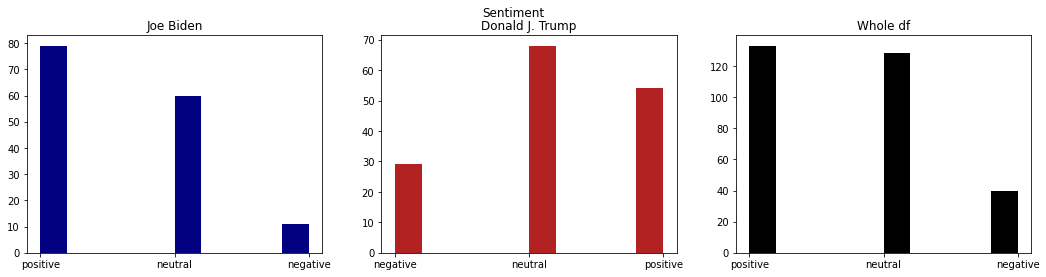

In [ ]:
f, ax = plt.subplots(1,3, figsize = (18, 4))

ax[0].hist(sentiment_biden, color = 'navy')
ax[0].set_title('Joe Biden')

ax[1].hist(sentiment_trump, color = 'firebrick')
ax[1].set_title('Donald J. Trump')

ax[2].hist(sentiment_df, color = 'black')
ax[2].set_title('Whole df')

f.suptitle('Sentiment')
plt.show()

We can see that for both candidates the least common sentiment is negative. Biden's tweets tends to have better response than Trumps.

Let's see how sentiment changes over time.

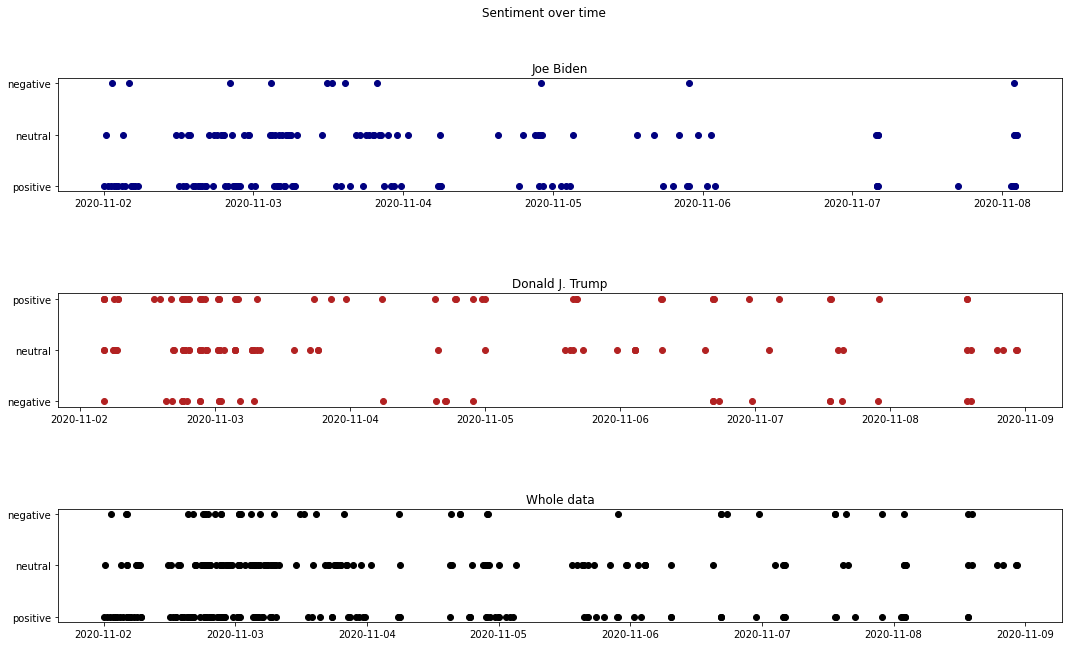

In [ ]:
f, ax = plt.subplots(3,1, figsize = (18,10))
f.subplots_adjust(hspace=0.9)

ax[0].scatter(x=df1["created_at"], y=sentiment_biden, color = 'navy')
ax[0].set_title('Joe Biden')

ax[1].scatter(x=df2["created_at"], y=sentiment_trump, color = 'firebrick')
ax[1].set_title('Donald J. Trump')

ax[2].scatter(x=df["created_at"], y=sentiment_df, color = 'black')
ax[2].set_title('Whole data')

f.suptitle('Sentiment over time')
plt.show()